In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

In [3]:
path = r"D:\Gemy Study\Course_Data Science\Assignments\FuelConsumption.csv"
df = pd.read_csv(path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
MAKE,1067,39,FORD,90
MODEL,1067,663,F150 FFV 4X4,8
VEHICLECLASS,1067,16,MID-SIZE,178
TRANSMISSION,1067,22,A6,222
FUELTYPE,1067,4,X,514


In [8]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

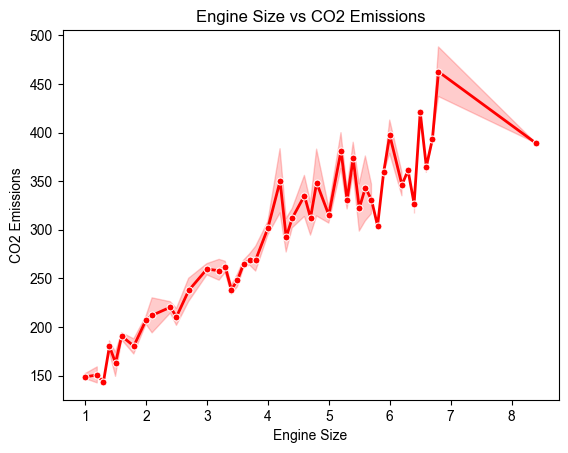

In [10]:
sns.lineplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df, color='red', marker='o', markersize=5, linewidth=2)
sns.set_style("darkgrid")
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions') 
plt.title('Engine Size vs CO2 Emissions')
plt.show()

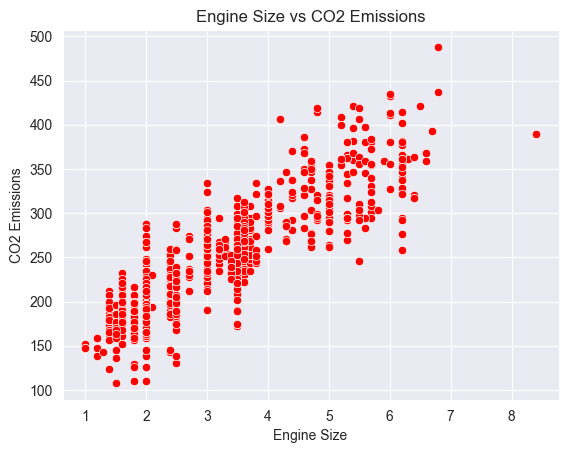

In [11]:
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df, color='red')
sns.set_style("darkgrid")
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions') 
plt.title('Engine Size vs CO2 Emissions')
plt.show()

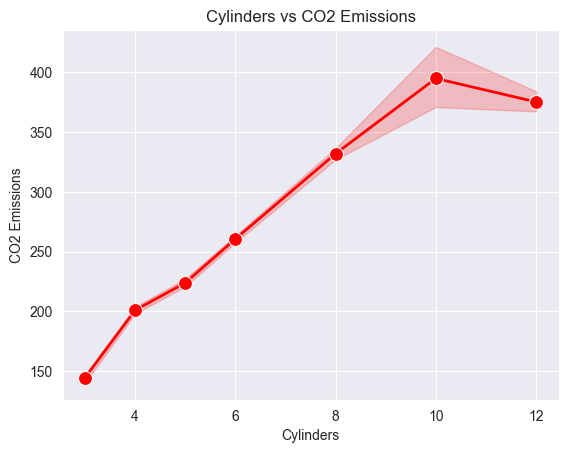

In [12]:
sns.lineplot(x='CYLINDERS', y='CO2EMISSIONS', data=df, color='red',marker='o', markersize=10, linewidth=2)
sns.set_style("darkgrid")
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.title('Cylinders vs CO2 Emissions')
plt.show()

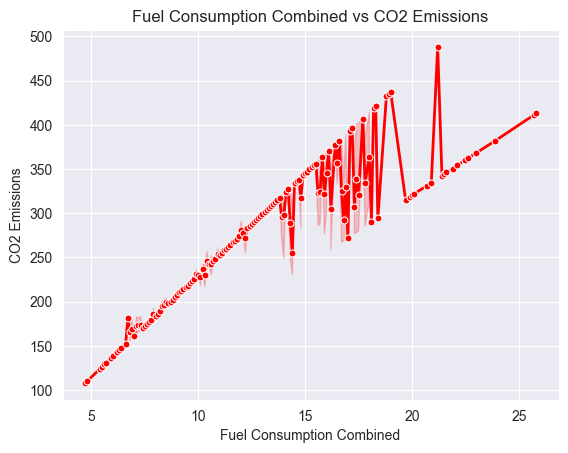

In [13]:
sns.lineplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=df, color='red', marker='o', markersize=5, linewidth=2)
sns.set_style("darkgrid")
plt.xlabel('Fuel Consumption Combined')
plt.ylabel('CO2 Emissions')
plt.title('Fuel Consumption Combined vs CO2 Emissions')
plt.show()

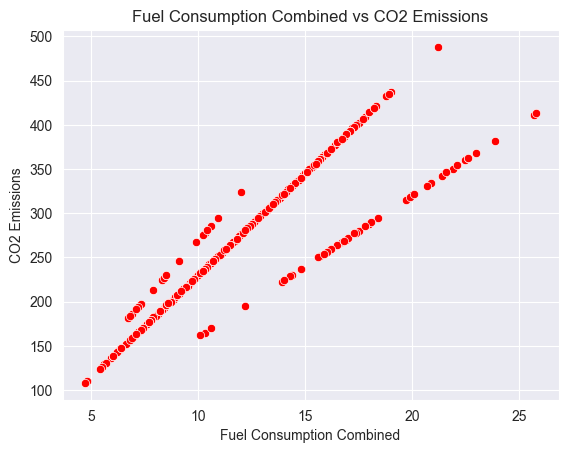

In [14]:
sns.scatterplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=df, color='red')
sns.set_style("darkgrid")
plt.xlabel('Fuel Consumption Combined')
plt.ylabel('CO2 Emissions')
plt.title('Fuel Consumption Combined vs CO2 Emissions')
plt.show()

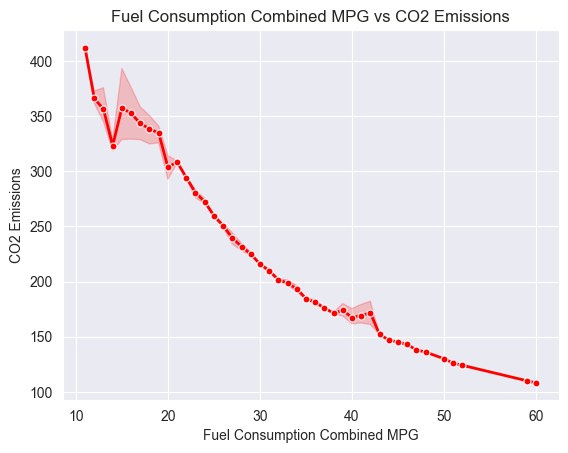

In [15]:
sns.lineplot(x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS', data=df, color='red', marker='o', markersize=5, linewidth=2)
sns.set_style("darkgrid")
plt.xlabel('Fuel Consumption Combined MPG')
plt.ylabel('CO2 Emissions')
plt.title('Fuel Consumption Combined MPG vs CO2 Emissions')
plt.show()

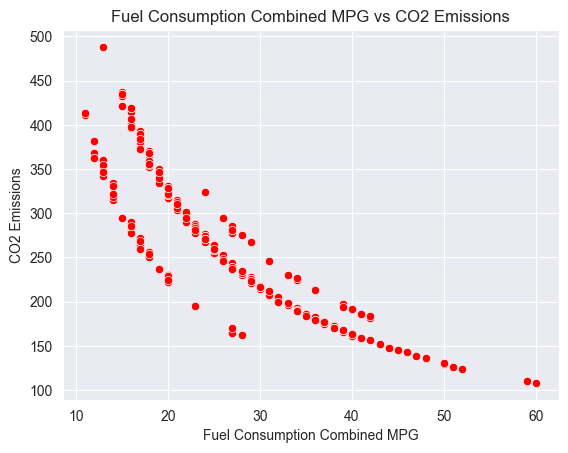

In [16]:
sns.scatterplot(x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS', data=df, color='red')
sns.set_style("darkgrid")
plt.xlabel('Fuel Consumption Combined MPG')
plt.ylabel('CO2 Emissions')
plt.title('Fuel Consumption Combined MPG vs CO2 Emissions')
plt.show()

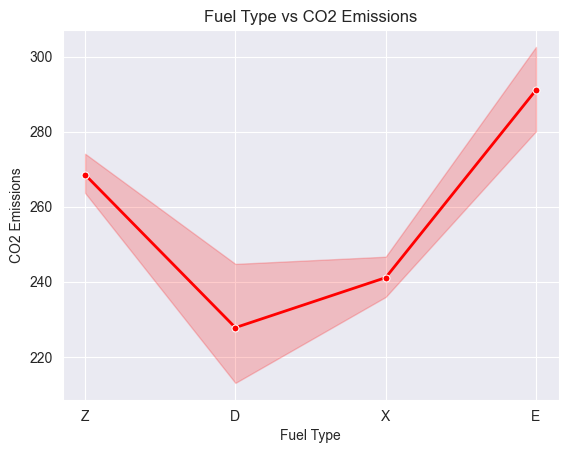

In [17]:
sns.lineplot(x='FUELTYPE',y='CO2EMISSIONS',data=df,color='red',marker='o',markersize=5,linewidth=2)
sns.set_style("darkgrid")
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions')
plt.title('Fuel Type vs CO2 Emissions')
plt.show()

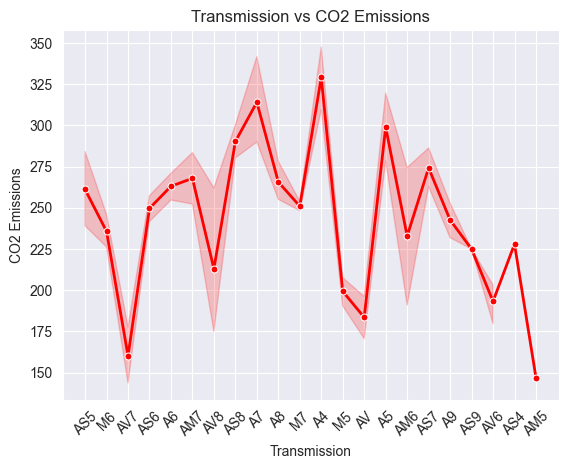

In [18]:
sns.lineplot(x='TRANSMISSION',y='CO2EMISSIONS',data=df,color='red',marker='o',markersize=5,linewidth=2)
sns.set_style("darkgrid")
plt.xlabel('Transmission')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=45)
plt.title('Transmission vs CO2 Emissions')
plt.show()

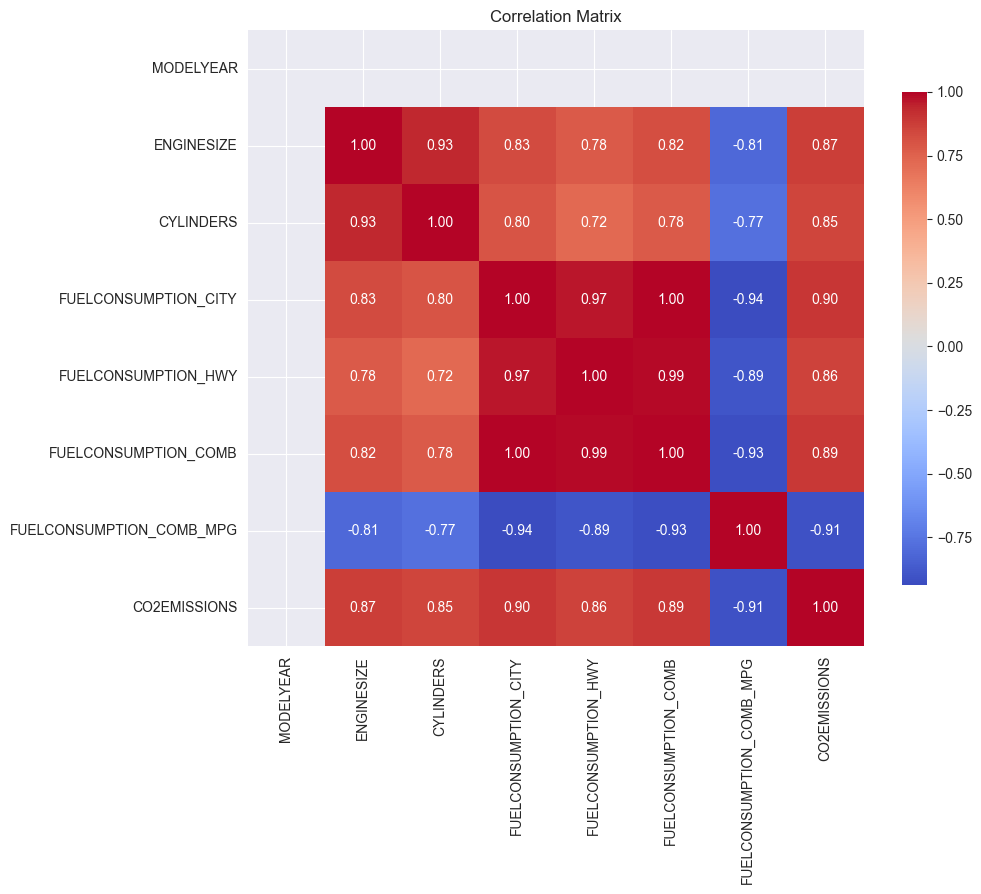

In [19]:
corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


In [48]:
x= df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y= df[['CO2EMISSIONS']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 18.02
Mean Squared Error (MSE): 589.24
Root Mean Squared Error (RMSE): 24.27
R² Score: 0.86


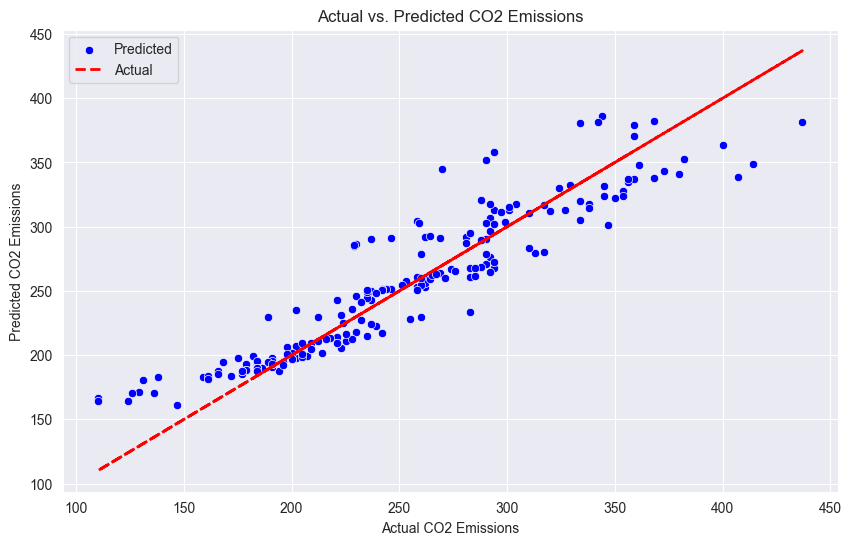

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred.flatten(),color='blue')
plt.plot(y_test.values.flatten(), y_test.values.flatten(), color='red', linewidth=2, linestyle="--", label="Perfect Fit")
sns.set_style("darkgrid")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs. Predicted CO2 Emissions")
plt.legend(['Predicted', 'Actual'])
plt.show()